## On the difference between a consistent and an arbitrary measure of affine similarity
Navid Shokouhi

Canonical correlation analysis is often used to compare the linear dependence of one multivariate random vector ($\textbf{X}$) given an another $\textbf{Y}$ [1,2]. Therefore, it can be viewed as an indicator of the "affine similarity" between these two random vectors. CCA returns a series of canonical correlation coefficients $r_1,\dots,r_n$, where $n=\min(dim(\textbf{X}),dim(\textbf{Y}))$, that sequentially determine the largest cosine of the anlges between the subspaces spanned by the columns of $\textbf{X}$ and $\textbf{Y}$[3]. In many applications that use CCA it would be useful to summarize the information provided by all $r_i$ into a single measure. Several well-known statistical measures, including the likelihood ratio and Wilk's lambda can be used for this exact purpose [2]. The question addressed in the example below is "What is the difference between a statistically significant measure and an arbitrary measure?"


### Wilk's lambda
Wilk's lambda [2] can be viewed as an approximate measure of the likelihood ratio that compares two likelihoods: $H_1: $ $\textbf{X}$ depends on $\textbf{Y}$, and $H_0:$ $\textbf{X}$ and $\textbf{Y}$ are independent. 
What gives statistical significance to Wilk's lambda and the related likelihood ratio test is that they can be asymptotically approximated to a $\xi$-squared distribution, whose degree-of-freedom (i.e., mean) has a one-to-one relationship with the number of significantly large enough canonical correlations. 

$$
\Lambda_{gof} = -n\sum_{i=1}^n\log(1-r_i^2)
$$

In [10]:
import numpy as np

def wilks_lambda(canon_corrs,n): 
    """implementation of the goodness-of-fit term in 
    Wilk's lambda. 
    This isn't the actual lambda parameter, but rather the 
    term that is attributed to the similarity. """
    return -n*np.sum(np.log(1-canon_corrs**2))

### Sum of canonical correlations: a non-significant metric
Let's say that we decide to summarize another affine similarity measure. A reasonable choice would be the mean or sum of the canonical correlations. There is no well-defined (as far as I know) approximate statistical density function assigned to the sum of canonical correlations. Therefore, $\sum_i r_i$ cannot be considered an estimator of the similarity between $\textbf{X}$ and $\textbf{Y}$, unlike Wilk's lambda.

$$
d(\textbf{X},\textbf{Y})=\sum_{i=1}^{n}r_i
$$


### Example: $\sum_i r_i$ vs. Wilk's lambda
In the example below, we consider different pairs of random vectors ($\textbf{X}_l$,$\textbf{Y}_l$), where $\textbf{X}_l$ and $\textbf{Y}_l$ are $10$ and $9$-dimension, respectively. The subscript $l$ determines the number of correlated components that have been embeded into $\textbf{X}_l$ and $\textbf{Y}_l$ using an $l$-dimensional latent random vector $\textbf{Z}_l$, where $l$ ranges between $1,\dots,9$:

$$ 
\textbf{X}_l = \textbf{W}_x \textbf{Z}_l + \xi_x, \\
\textbf{Y}_l = \textbf{W}_y \textbf{Z}_l + \xi_y
$$
where $\textbf{W_x}$ and $\textbf{W_y}$ are $10\times l$ and $9\times l$ random matrices. $\xi_x$ and $\xi_y$ represent random noise. 

We expect that given enough samples from $\textbf{X}_l$ and $\textbf{Y}_l$, a reliable similarity measure should increase with $l$. 

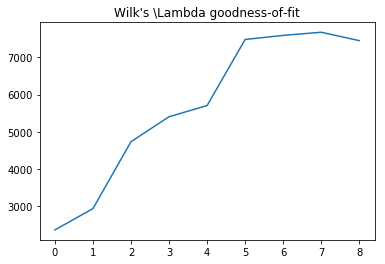

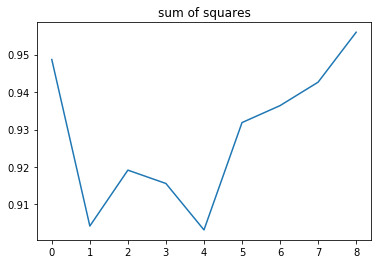

In [11]:
from sklearn.cross_decomposition import CCA
import scipy.stats

def get_canon_corrs(X,Y,n_components=1):
    cca = CCA(n_components=n_components)
    cca.fit(X, Y)
    X_c, Y_c = cca.transform(X, Y)
    
    rho = []
    for i in range(n_components):
        corrcoef,_ = scipy.stats.pearsonr(X_c[:,i],Y_c[:,i])
        rho.append(corrcoef)
    return np.array(rho)


if __name__=='__main__':
    n_samples = 1000
    n_iters = 1
    gofs1 = np.zeros((1,9))
    gofs2 = np.zeros((1,9))
    for j in range(n_iters):
        for i in range(9):
            n_correlated = i+1
            dim_x = 10
            dim_y = 9
            z   = np.random.randn(n_correlated,n_samples)
            W_x = np.random.randn(dim_x,n_correlated)
            W_y = np.random.randn(dim_y,n_correlated)
            x = np.dot(W_x,z) + np.random.randn(dim_x,n_samples)
            y = np.dot(W_y,z) + np.random.randn(dim_y,n_samples)
            gofs1[0,i]+=(wilks_lambda(get_canon_corrs(x.T,y.T,5),n_samples))
            gofs2[0,i]+=(sum(get_canon_corrs(x.T,y.T)))
    import pylab
    pylab.plot(gofs1[0,:])
    pylab.title("Wilk's \Lambda goodness-of-fit")
    pylab.show()
    pylab.plot(gofs2[0,:])
    pylab.title('sum of squares')
    pylab.show()
            

It can be clearly observed that the sum of squares does not monotically increase with $l$. This means that although an increase in $l$ means that $\textbf{X}_l$ and $\textbf{Y}_l$ are more correlated, the sum of squares does not reflect this correlation. 

### References:
[1] Hotelling, H., "Relations between two sets of variates," Biometrika 28.3/4 (1936): 321-377.

[2] Kshirsagar, A. M., "Multivariate Analysis, " ser. Statistics: Textbooks and Monographs vol. 2 (1980)

[3] Pezeshki, Ali, et al. "Canonical coordinates are the right coordinates for low-rank Gauss–Gauss detection and estimation." IEEE Transactions on Signal Processing 54.12 (2006): 4817-4820.
